# SkLearn Kmeans para analisar a relação do IDH com a Nota média do ENEM utilizando dados disponíveis no Amazon Redshift.

In [3]:
!pip install psycopg2

In [78]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [81]:
con=psycopg2.connect(dbname= 'dev', host='redshift-cluster-1.crbphfefbqxz.us-east-2.redshift.amazonaws.com', 
port= '5439', user= 'admin', password= 'Thos2009')

In [82]:
sql = "SELECT IDH, NOTA_MEDIA FROM POP_IDH_SCORE;"

In [83]:
df_pop_idh_score = pd.read_sql_query(sql, con)

In [84]:
con.close()

In [85]:
df_pop_idh_score.head()

,idh,nota_media
0,0.641,502.387
1,0.692,509.322
2,0.672,512.073
3,0.689,496.341
4,0.596,498.538


In [86]:
kmeans = KMeans(n_clusters=3).fit(df_pop_idh_score)
centroids = kmeans.cluster_centers_
print(centroids)

[[  0.60444308 487.58824869]
 [  0.75353768 541.35781263]
 [  0.67815535 513.16933786]]


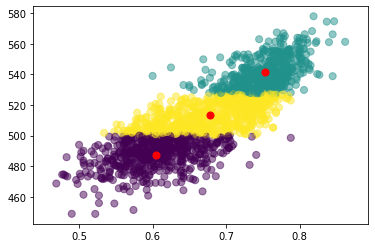

In [89]:
plt.scatter(df_pop_idh_score['idh'], df_pop_idh_score['nota_media'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)